## Kümeleme##
ögeleri benzwer özelliklerine göre gruplara ayırma işlemidir.
Denetimsiz / Unsupervised Learning

In [1]:
# kütüphaneleri içe aktar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ls

 Volume in drive D is Depo
 Volume Serial Number is EE9B-2485

 Directory of D:\yapayzeka\yapay zeka bootcamp\zafer_projeler\ders11_gradio

16.08.2024  22:18    <DIR>          .
16.08.2024  22:18    <DIR>          ..
16.08.2024  22:08    <DIR>          .ipynb_checkpoints
16.08.2024  21:49               108 activate_venv.bat
16.07.2024  15:57             1.467 app.py
05.07.2024  11:58                 2 cars.csv
05.07.2024  12:04           141.824 cars.xls
16.07.2024  15:56                79 Cloud Icon - Font Awesome.url
16.08.2024  22:14           226.412 Clustering.ipynb
16.07.2024  15:56                87 drmurataltun-gradioWC at main.url
16.08.2024  22:18             6.744 gradio WC.ipynb
16.07.2024  15:56               114 H2O????-?? Automl?? Academic??Performance.url
16.07.2024  15:56                38 requirements.txt
16.08.2024  22:17            40.892 stylecloud.png
16.07.2024  16:39            10.104 Untitled.ipynb
16.08.2024  21:32    <DIR>          venv
              12 File(

In [3]:
#veri dosyasını yükle
df=pd.read_excel('cars.xls')

In [4]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [6]:
#Modelleme
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [7]:
#belirli özelliklere göre kümeler oluşturacağız
X=df[['Price','Mileage','Cylinder']]

In [8]:
X.head(9)

,Price,Mileage,Cylinder
0,17314.103129,8221,6
1,17542.036083,9135,6
2,16218.847862,13196,6
3,16336.913140,16342,6
4,16339.170324,19832,6
5,15709.052821,22236,6
6,15230.003390,22576,6
7,15048.042184,22964,6
8,14862.093870,24021,6


In [9]:
model=KMeans(n_clusters=4,random_state=42)
model.fit(X)

KMeans(n_clusters=4, random_state=42)

In [10]:
predict=model.predict(X)
X['Cluster']=predict
X

C:\Users\zaferturan\AppData\Local\Temp\ipykernel_7852\2226996195.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster']=predict


,Price,Mileage,Cylinder,Cluster
0,17314.103129,8221,6,0
1,17542.036083,9135,6,0
2,16218.847862,13196,6,0
3,16336.913140,16342,6,3
4,16339.170324,19832,6,3
...,...,...,...,...
799,16507.070267,16229,6,3
800,16175.957604,19095,6,3
801,15731.132897,20484,6,3
802,15118.893228,25979,6,1


In [11]:
silhouette_score(X, X['Cluster'])

np.float64(0.3381980274495343)

Silhouette skoru -1 ile 1 arasında bir değer alır. Değer 1'e yaklaştıkça, veri noktaları kendi kümeleriyle çok iyi eşleşirken diğer kümelerden de iyi ayrılmaktadır. Değer 0'a yaklaştıkça, veri noktaları kendi kümeleriyle orta derecede eşleşir ve diğer kümelerden de orta derecede ayrılır

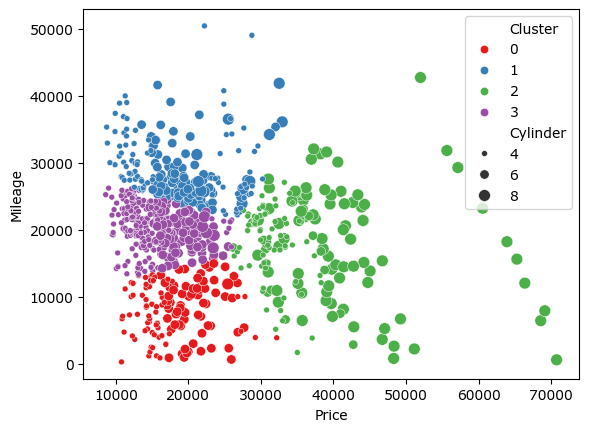

In [12]:
sns.scatterplot(x='Price',y='Mileage',hue='Cluster', size='Cylinder', palette='Set1',data=X)
plt.show()

In [13]:
!pip install yellowbrick

In [14]:
import yellowbrick

In [15]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model=KMeans(random_state=42)
visualizer=KElbowVisualizer(model,k=(2,10),metric='distortion',
                           timing=False)
visualizer.fit(X)
visualizer.show()


findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.


ValueError: Failed to find font DejaVu Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0, and fallback to the default font was disabled

<Figure size 800x550 with 2 Axes>

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>